In [0]:
from google.colab import drive
drive.mount('/content/drive')

import os
from os import listdir
from os.path import isfile, join
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

img_pixels = 224
img_ratio = img_pixels/256

def readImages(filePath):
    images = []
    imgReadCounter = 0
    files = [f for f in listdir(filePath) if isfile(join(filePath, f))]
    for file_name in files:
        if file_name != '.DS_Store':
            imgReadCounter+=1
            file = filePath + '/' + file_name
            print("read img ", imgReadCounter)
            img = cv2.imread(file)
            #print(img)
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_small = cv2.resize(img, (0,0), fx=img_ratio, fy=img_ratio) 
#             img_small=preprocess_input(img_small)
            images.append(img_small)
        
    return np.array(images), len(images)

def create_model():
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(img_pixels,img_pixels,3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

def create_model2():
    classifier = Sequential()
    # Convolution Step 1
    classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))
    # Max Pooling Step 1
    classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
    classifier.add(BatchNormalization())
    # Convolution Step 2
    classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))
    # Max Pooling Step 2
    classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
    classifier.add(BatchNormalization())
    # Convolution Step 3
    classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
    classifier.add(BatchNormalization())
    # Convolution Step 4
    classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
    classifier.add(BatchNormalization())
    # Convolution Step 5
    classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))
    # Max Pooling Step 3
    classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
    classifier.add(BatchNormalization())
    # Flattening Step
    classifier.add(Flatten())
    # Full Connection Step
    classifier.add(Dense(units = 4096, activation = 'relu'))
    classifier.add(Dropout(0.4))
    classifier.add(BatchNormalization())
    classifier.add(Dense(units = 4096, activation = 'relu'))
    classifier.add(Dropout(0.4))
    classifier.add(BatchNormalization())
    classifier.add(Dense(units = 1000, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(BatchNormalization())
    classifier.add(Dense(units = 2, activation = 'softmax'))
    classifier.summary()
    # Compiling the CNN
    classifier.compile(optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.005),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])
    return classifier


    # Compiling the CNN
#     optimizer_new = optimizers.SGD(lr=learn_rate, momentum=0.9, decay=0.005)
    
#     if optimizer == 'SGD':
#       optimizer_new = optimizers.SGD(lr=learn_rate, momentum=0.9, decay=0.005)
      
#     if optimizer == 'RMSprop':
#       optimizer_new = optimizers.RMSprop(lr=learn_rate)
#     if optimizer == 'Adagrad':
#       optimizer_new = optimizers.Adagrad(lr=learn_rate)
      
#     if optimizer == 'Adadelta':
#       optimizer_new = optimizers.Adadelta(lr=learn_rate)
    
#     if optimizer ==  'Adam':
#       optimizer_new = optimizers.Adam(lr=learn_rate)
    
#     if optimizer == 'Adamax':
#       optimizer_new = optimizers.Adamax(lr=learn_rate)
    
#     if optimizer == 'Nadam':
#       optimizer_new = optimizers.Nadam(lr=learn_rate)
    
    
    
#     classifier.compile(optimizer=optimizer_new,
#                        loss='categorical_crossentropy',
#                        metrics=['accuracy'])

    return classifier

def create_model3():
    model = Sequential()
    model.add(Conv2D(32, (8, 8), input_shape=(img_pixels, img_pixels, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))

    model.add(Conv2D(32, (8, 8)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, (8,8)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

# ratio_train = 70
# ratio_validate = 20
# ratio_test = 10

late_blight_path='/content/drive/My Drive/Colab Notebooks/Tomato___Late_blight'
late_blight_modified_path='/content/drive/My Drive/Colab Notebooks/blight_modified'
healthy_path='/content/drive/My Drive/Colab Notebooks/Tomato___healthy'
healthy_modified_path='/content/drive/My Drive/Colab Notebooks/healthy_modified'

late_blight_images, blight_size = readImages(late_blight_path)
healthy_images, healthy_size = readImages(healthy_path)
late_blight_modified_images, blight_modified_size = readImages(late_blight_modified_path)
healthy_modified_images, healthy_modified_size = readImages(healthy_modified_path)


full_blight_images = np.concatenate((late_blight_images,late_blight_modified_images),axis=0)
full_healthy_images = np.concatenate((healthy_images, healthy_modified_images),axis=0)

X = np.concatenate((full_blight_images, full_healthy_images),axis=0)

#train Y
y_blight = np.ones(len(full_blight_images))
y_healthy = np.zeros(len(full_healthy_images))
Y = np.concatenate((y_blight, y_healthy))

x_train, x_testing, y_train, y_testing = train_test_split(X, Y, test_size=0.3, stratify=Y)

x_val, x_test, y_val, y_test = train_test_split(x_testing, y_testing, test_size = 0.33, stratify = y_testing)

y_train = keras.utils.to_categorical(y_train, 2)
y_val = keras.utils.to_categorical(y_val, 2)
y_test = keras.utils.to_categorical(y_test, 2)





Mounted at /content/drive


Using TensorFlow backend.


Found GPU at: /device:GPU:0
read img  1
read img  2
read img  3
read img  4
read img  5
read img  6
read img  7
read img  8
read img  9
read img  10
read img  11
read img  12
read img  13
read img  14
read img  15
read img  16
read img  17
read img  18
read img  19
read img  20
read img  21
read img  22
read img  23
read img  24
read img  25
read img  26
read img  27
read img  28
read img  29
read img  30
read img  31
read img  32
read img  33
read img  34
read img  35
read img  36
read img  37
read img  38
read img  39
read img  40
read img  41
read img  42
read img  43
read img  44
read img  45
read img  46
read img  47
read img  48
read img  49
read img  50
read img  51
read img  52
read img  53
read img  54
read img  55
read img  56
read img  57
read img  58
read img  59
read img  60
read img  61
read img  62
read img  63
read img  64
read img  65
read img  66
read img  67
read img  68
read img  69
read img  70
read img  71
read img  72
read img  73
read img  74
read img  75
read i

In [0]:
from keras import backend as K
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])
def create_model2():
    classifier = Sequential()
    # Convolution Step 1
    classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))
    # Max Pooling Step 1
    classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
    classifier.add(BatchNormalization())
    # Convolution Step 2
    classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))
    # Max Pooling Step 2
    classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
    classifier.add(BatchNormalization())
    # Convolution Step 3
    classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
    classifier.add(BatchNormalization())
    # Convolution Step 4
    classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
    classifier.add(BatchNormalization())
    # Convolution Step 5
    classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))
    # Max Pooling Step 3
    classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
    classifier.add(BatchNormalization())
    # Flattening Step
    classifier.add(Flatten())
    # Full Connection Step
    classifier.add(Dense(units = 4096, activation = 'relu'))
    classifier.add(Dropout(0.4))
    classifier.add(BatchNormalization())
    classifier.add(Dense(units = 4096, activation = 'relu'))
    classifier.add(Dropout(0.4))
    classifier.add(BatchNormalization())
    classifier.add(Dense(units = 1000, activation = 'relu'))
    classifier.add(Dropout(0.2))
    classifier.add(BatchNormalization())
    classifier.add(Dense(units = 2, activation = 'softmax'))
    classifier.summary()
    # Compiling the CNN
    classifier.compile(optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.005),
                       loss='binary_crossentropy',
                       metrics=['acc',f1_m,precision_m, recall_m])
    return classifier

In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

batch_size = [40, 100, 200]
epochs = [15, 50]
learn_rate = [0.001, 0.01]
optimizer = ['SGD',  'Adam', 'Nadam']

model = KerasClassifier(build_fn=create_model2, verbose=1)
param_grid = dict(optimizer = optimizer, learn_rate = learn_rate, epochs=epochs, batch_size=batch_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Found GPU at: /device:GPU:0


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 6, 6, 384)        

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ResourceExhaustedError: ignored

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
batch_normalization_50 (Batc (None, 8, 8, 256)         1024      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 6, 6, 384)        

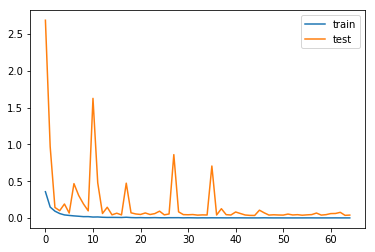

In [0]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
model = create_model2()
history = model.fit(x_train, y_train,
          batch_size=200,
          epochs=100,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks=[es]
         )



score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

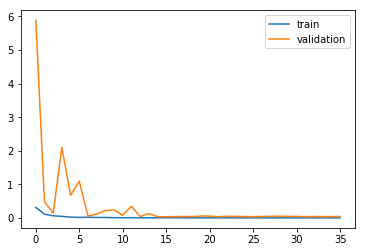

In [0]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [0]:
model.save('adam224.h5')

In [0]:

# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/My Drive/model_sgd_lr_001_99_35e.json", "w") as json_file:
   json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/model_sgd_lr_001_99_35e.h5")
print("Saved")

Saved


In [0]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test f1:', score[2])
print('Test precision:', score[3])
print('Test recall:', score[4])


Test loss: 0.018261495609083443
Test accuracy: 0.9936908517350158
Test f1: 0.9936908397012705
Test precision: 0.9936908517350158
Test recall: 0.9936908517350158


In [0]:

from sklearn.metrics import classification_report

y_pred = model.predict(x_test, batch_size=64, verbose=1)
y_pred = (y_pred > 0.5) 

print(classification_report(y_test, y_pred))


951/951 [==============================] - 1s 987us/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       475
           1       1.00      0.99      0.99       476

   micro avg       0.99      0.99      0.99       951
   macro avg       0.99      0.99      0.99       951
weighted avg       0.99      0.99      0.99       951
 samples avg       0.99      0.99      0.99       951

